# 感知机

与门`AND`定义
$$
y=\begin{cases}
0,\quad (w_1x_1+w_2x_2) \le \theta\\
1,\quad (w_1x_1+w_2x_2) \gt \theta
\end{cases}
$$

In [3]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 # 实际上有无数个参数可以满足这个条件
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

使用权重和偏置重新定义与门
$$
y=\begin{cases}
0,\quad (b+w_1x_1+w_2x_2) \le 0\\
1,\quad (b+w_1x_1+w_2x_2) \gt 0
\end{cases}
$$

- 权重决定输入参数的重要性
- 偏置决定神经元激活的阈值

In [4]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2]) # 输入
    w = np.array([0.5, 0.5]) # 权重
    b = -0.7 # 偏置
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5,-0.5]) # 仅权重和偏置与AND不同
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5]) # 仅权重和偏置与AND不同
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1


print(AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1))
print(NAND(0, 0), NAND(1, 0), NAND(0, 1), NAND(1, 1))
print(OR(0, 0), OR(1, 0), OR(0, 1), OR(1, 1))

0 0 0 1
1 1 1 0
0 1 1 1


单层感知机只能表示线性分割，因此无法实现异或门（非线性空间）。但是和利用组合电路门实现异或门一样，可以利用多层感知机实现异或。

In [5]:
def XOR(x1, x2): # x1, x2是第一层的输入
    s1 = NAND(x1, x2) # 第一层的输出
    s2 = OR(x1, x2) # 第一层的输出
    # print(s1, s2)
    y = AND(s1, s2) # 第二层的输出
    return y

print(XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1))

0 1 1 0


# 神经网络

把输入信号的总和转换为输出信号，这种函数称为`激活函数`(`activation function`)。
$$
\begin{aligned}
a &= b + w_1x_1 + w_2x_2 \\
y &= h(a)
\end{aligned}
$$

上式表示信号的加权总和为节点`a`，然后节点`a`被激活函数`h()`转换成节点`y`。

## 阶跃函数
感知机使用的激活函数是阶跃函数，一旦输出超过某个阈值就切换输出。

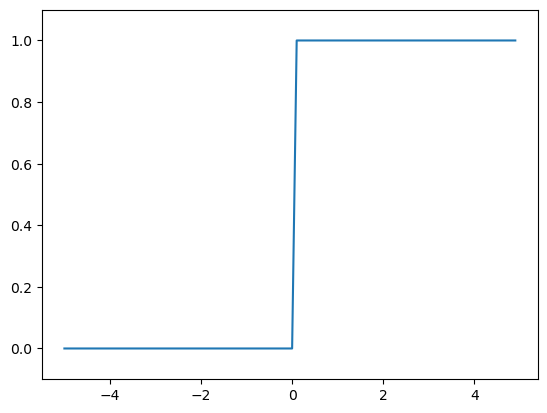

In [7]:
def step_function(x): # 阶跃函数, 支持向量化
    return np.array(x > 0, dtype=int) # 把bool转换为int

import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

## sigmoid函数

定义
$$
h(x) = \frac{1}{1 + e^{-x}}
$$

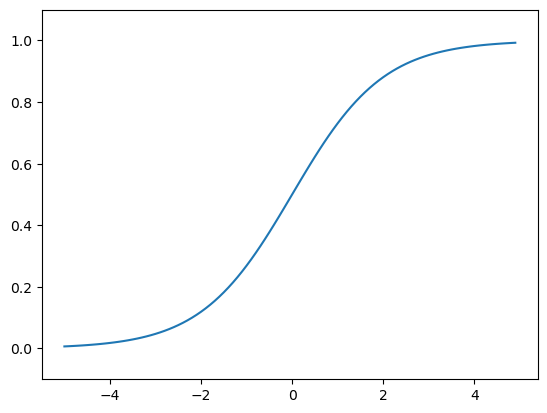

In [8]:
def sigmoid(x): # sigmoid函数, 支持向量化
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

阶跃函数和sigmoid函数都是非线性函数，这很重要。激活函数如果是线性函数，那么不论中间有多少层总是存在一个等效的无中间层的神经网络，也就是说加深神经网络的层并没有意义。

## ReLU函数

sigmoid快退出历史舞台了，ReLU(Rectified Linear Unit)函数是最近大规模使用的激活函数，其定义如下：
$$
f(x) = \max(0, x)
$$

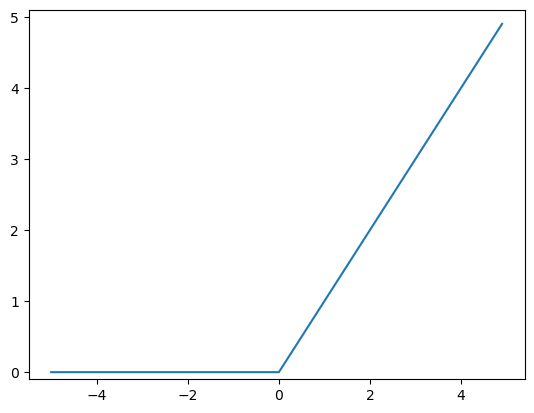

In [9]:
def relu(x): # relu函数, 支持向量化
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.1) # 指定y轴的范围
plt.show()

## softmax函数

$$
\begin{aligned}
y_k = \frac{e^{a_k}} {\sum_{j=1}^{n} e^{a_i}} &= \frac {Ce^{a_k}} {C\sum_{j=1}^{n} e^{a_i}} \\
&=\frac {e^{{a_k}+\log C}} {\sum_{j=1}^{n} e^{{a_i}+\log C}} \\
&=\frac {e^{{a_k}+C'}} {\sum_{j=1}^{n} e^{{a_i}+C'}} \\
\end{aligned}
$$

- 输出层的神经元收到所有输入层神经元的影响
- 总是输出0.0到1.0之间的实数，输出值的总和总是1，因此可以把输出解释为“概率”
- 适合分类问题

In [10]:
def softmax(a): # softmax函数, 支持向量化
    c = np.max(a)
    exp_a = np.exp(a - c) # 防止溢出
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


# MNIST

In [12]:
import sys, os
sys.path.append(os.pardir) # 为了导入父目录的文件而进行的设定
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # 把numpy数组转换为图像
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False) # flatten=True表示把图像展开成一维数组

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) # (784,)
img = img.reshape(28, 28) # 把图像的形状变为原来的尺寸
print(img.shape) # (28, 28)

img_show(img)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


基于MNIST数据集实现神经网络的推理处理:
- 输入层有`28x28=784`个神经元，输出有10个神经元(识别0~9数字)
- 两个隐藏层，第一个层有50个神经元，第二个层有100个神经元

In [16]:
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network(): # 读入保存在pickle文件中的学习到的权重参数
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x): # 识别函数
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] # 读入权重参数
    b1, b2, b3 = network['b1'], network['b2'], network['b3'] # 读入偏置参数

    a1 = np.dot(x, W1) + b1 # 第一层的输入
    z1 = sigmoid(a1) # 第一层的输出
    a2 = np.dot(z1, W2) + b2 # 第二层的输入
    z2 = sigmoid(a2) # 第二层的输出
    a3 = np.dot(z2, W3) + b3 # 第三层的输入
    y = softmax(a3) # 第三层的输出

    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)): # 逐个识别
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) # Accuracy:0.9352

# 批处理
batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # 逐个识别
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 获取每行概率最高的元素的索引
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) # Accuracy:0.9352

Accuracy:0.9352
Accuracy:0.9352
